In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dataset = "iris_data.txt"

df = pd.read_csv(dataset,delimiter=',',header=None,names=['sepal_length','sepal_width','petal_length','petal_width','specie'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
X = df[['sepal_length','petal_width']].values # Feature set
Y = df['specie'].values # Class labels

le = preprocessing.LabelEncoder()
le.fit(np.unique(Y))
Y_encoded = le.transform(Y)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y_encoded,test_size=0.4,stratify=Y_encoded,random_state=89)

Text(0, 0.5, 'Petal Width')

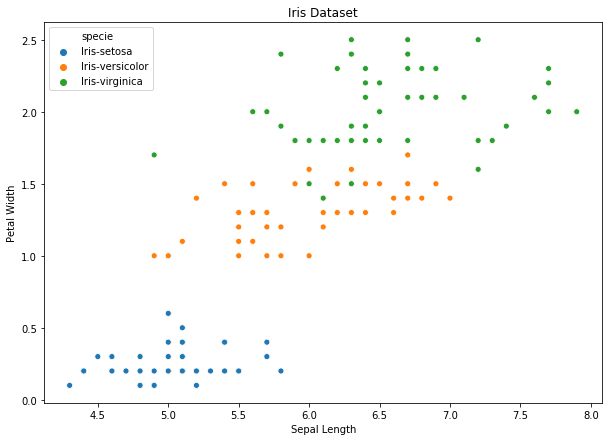

In [117]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="sepal_length", y="petal_width",hue="specie", data=df)
plt.title("Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")

In [118]:
class KNNClassifier():
    def __init__(self):
        pass
    def train(self,X,Y):
        self.X = X
        self.Y = Y
    def predict(self,x,k,method='euclid'):
        predictions = []
        for test_input in x:
            if(method == 'euclid'):
                distances = self.euclid_distance(test_input,self.X)
            elif(method == 'manhattan'):
                distances = self.manhattan_distance(test_input,self.X)
            else:
                distances = self.cosine_distance(test_input,self.X)

            min_k_distance_indices = np.argsort(distances)[:k] # K minimum distance indices
            nearest_classes = list(self.Y[min_k_distance_indices]) # Classes of minimum k distances
            classes, occurence = np.unique(nearest_classes, return_counts=True)
            predictions.append(classes[occurence.argmax()])
        return predictions
    
    def euclid_distance(self,x1,x2):
        return np.sqrt(np.sum(np.power(x1-x2, 2),axis=1))
    def manhattan_distance(self,x1,x2):
        return np.sum(np.absolute(x1-x2),axis=1)
    def cosine_distance(self,x1,x2):
        return -1 * np.dot(x2,x1) / (np.linalg.norm(x1) * np.linalg.norm(x2,axis=1)) # In cosine similarity, maximum value means most similar so multiply with -1.


In [119]:
clf = KNNClassifier()
clf.train(x_train,y_train)

distance_methods = ['euclid','manhattan','cosine']
test_size = len(x_test)

observations = pd.DataFrame(columns=['k','accuracy','error_count','method']) 

for method in distance_methods:
    for k in range(1,16,2):
        success = 0
        y_pred = np.array(clf.predict(x_test,k,method=method))
        success = np.count_nonzero(np.equal(y_pred,y_test))
        accuracy = success / test_size * 100
        error_count = test_size - success
        observations.loc[len(observations)] = [k,accuracy,str(error_count) + "/" + str(test_size),method]

In [120]:
observations

,k,accuracy,error_count,method
0,1,91.666667,5/60,euclid
1,3,95.000000,3/60,euclid
2,5,95.000000,3/60,euclid
3,7,93.333333,4/60,euclid
4,9,95.000000,3/60,euclid
5,11,95.000000,3/60,euclid
6,13,95.000000,3/60,euclid
7,15,93.333333,4/60,euclid
8,1,93.333333,4/60,manhattan
9,3,93.333333,4/60,manhattan


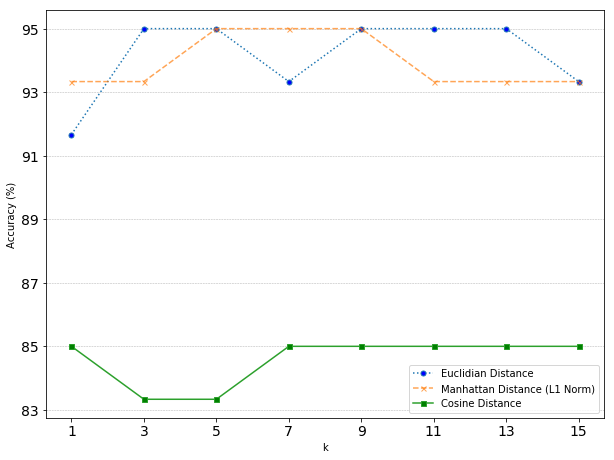

In [121]:
# Plot accuracy graph
euclid_metrics = observations[observations['method'] == "euclid"]
manhattan_metrics = observations[observations['method'] == "manhattan"]
cosine_metrics = observations[observations['method'] == "cosine"]

fig = plt.figure(figsize=(10,7.5))
plt.xticks(range(1, 16, 2), fontsize=14)
plt.yticks(range(75, 100, 2), fontsize=14)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.plot(euclid_metrics['k'], euclid_metrics['accuracy'], label='Euclidian Distance',linestyle='dotted', marker='o', markerfacecolor='blue', markersize=5)
plt.plot(manhattan_metrics['k'], manhattan_metrics['accuracy'], label = 'Manhattan Distance (L1 Norm)',linestyle='dashed', marker='x', markerfacecolor='orange', markersize=5,alpha=0.7)
plt.plot(cosine_metrics['k'], cosine_metrics['accuracy'], label = 'Cosine Distance', marker='s', markerfacecolor='green', markersize=5)
plt.legend()
plt.show()

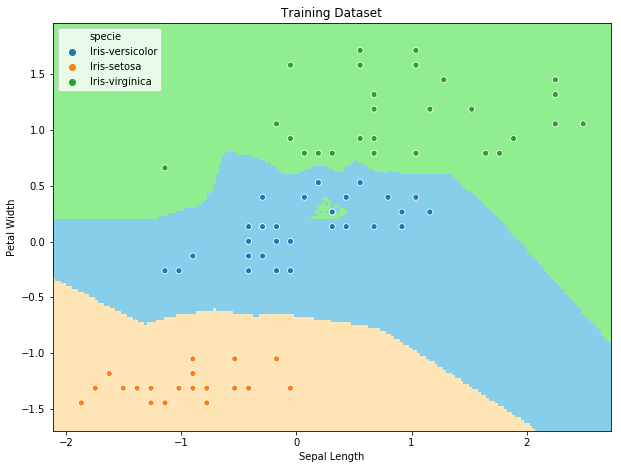

In [125]:
x_min = np.min(X[:, 0]) - 0.25
x_max = np.max(X[:, 0]) + 0.25
y_min = np.min(X[:, 1]) - 0.25
y_max = np.max(X[:, 1]) + 0.25


step = 0.025
xx,yy = np.mgrid[x_min:x_max:step,y_min:y_max:step]
grid_points = np.column_stack((xx.flatten(),yy.flatten()))

y_pred = clf.predict(grid_points,k=1,method='euclid')
y_pred = np.array(y_pred)

y_decoded = le.inverse_transform(y_train)
plot_df = pd.DataFrame(np.column_stack((x_train,y_decoded)),columns=['sepal_length','petal_width','specie']) 

plt.figure(figsize=(10,7.5))
cmap_list = ListedColormap(['moccasin', 'skyblue', 'lightgreen'])
plt.pcolormesh(xx, yy, y_pred.reshape(xx.shape), cmap=cmap_list)
sns.scatterplot(x='sepal_length',y='petal_width',hue='specie',data=plot_df)
plt.title("Training Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.show()